In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from struct_data import struct_data

csv_f_name = "../../data/train_data/data_martin_1_forsok2.csv"
annot_f_name = "../../data/annotation/martin_train_1.txt"

POSE_MAP= {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

knn_train = struct_data(csv_f_name, annot_f_name, POSE_MAP)

[[0.0, 122.72, 0], [124.92, 244.76, 1], [245.84, 363.24, 2], [366.48, 486.0, 3], [487.72, 604.68, 4], [606.76, 723.8, 5], [725.0, 843.4, 6], [846.88, 965.56, 7], [966.84, 1084.04, 8]]
106301
drops: 0
106301
106301


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

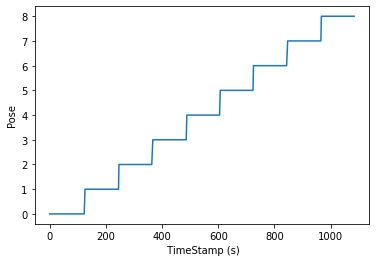

In [89]:
stamped_poses = knn_train.get_timestamp_and_pose()
print(stamped_poses)

df_train, df_stamped_poses = knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
#print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
#df['Pose'].hist(bins=4)
sns.lineplot(data=df_train, x=" TimeStamp (s)", y='Pose')

In [90]:
x_train = df_train.drop([' TimeStamp (s)'],axis=1)
x_train = x_train.drop(['Pose', ' FrameNumber', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)', ' Pressure (kPa)',
                      ' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)'],axis=1)
# x_train[x_train['SensorId'] == 1]
x_train

,SensorId,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,1,0.055852,-0.850004,-0.522613,0.477187,0.166713,0.773870,14.211246,-36.243279,-17.685274,57.598854,3.964652,112.215050,0.502203,-0.243316,-0.416553,-0.717686
1,1,0.053982,-0.847812,-0.524139,0.620501,-0.146498,0.744636,14.211246,-36.243279,-17.685274,57.605247,3.957579,112.217804,0.502149,-0.243379,-0.416570,-0.717692
2,1,0.054749,-0.845914,-0.523289,0.622881,-0.400285,0.575458,14.240719,-35.231506,-18.137564,57.639400,3.918052,112.217224,0.501948,-0.243785,-0.416619,-0.717667
3,1,0.055202,-0.845480,-0.522088,0.695164,-0.518200,0.490021,14.240719,-36.215172,-18.348635,57.646221,3.911144,112.215462,0.501921,-0.243865,-0.416629,-0.717652
4,1,0.057666,-0.846127,-0.522310,0.304298,-0.322965,0.419240,14.181771,-35.315819,-18.348635,57.649235,3.905876,112.214981,0.501900,-0.243914,-0.416625,-0.717653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107916,1,-0.563919,-0.536582,-0.622348,7.828902,4.842587,-2.334012,-12.315144,-22.668671,-34.389820,38.592827,-32.748474,84.916405,0.605194,-0.413525,-0.017726,-0.680017
107917,1,-0.546945,-0.530354,-0.625448,8.342178,5.524018,-2.284046,-12.079354,-23.146452,-33.847073,38.665550,-32.691067,84.936188,0.605020,-0.413634,-0.018595,-0.680083
107918,1,-0.533577,-0.538014,-0.627690,9.525555,6.282960,0.013785,-12.020405,-23.146452,-34.148598,38.744331,-32.643932,84.969955,0.604704,-0.413821,-0.019485,-0.680225
107919,1,-0.542843,-0.527788,-0.627427,8.695200,4.211807,1.764018,-11.961460,-23.034033,-34.510433,38.805588,-32.622150,85.017609,0.604278,-0.414032,-0.020160,-0.680455


In [91]:
print(y_train)
print(len(y_train))

0         0
1         0
2         0
3         0
4         0
         ..
107916    8
107917    8
107918    8
107919    8
107920    8
Name: Pose, Length: 106301, dtype: int64
106301


In [92]:
csv_file = "../../data/test_data/Simon_test_1.csv"
annot_file = "../../data/annotation/Simon_test_1.txt"
"""
csv_file = "../../data/train_data/data_martin_1_sub.csv"
annot_file = "../../data/annotation/martin_train_1_sub.txt"
"""
knn_test = struct_data(csv_file, annot_file, POSE_MAP)
s_poses = knn_test.get_timestamp_and_pose()
print(s_poses)
df_test, df_stamped_poses = knn_test.align_poses(s_poses)
df_test["SensorId"] = np.ones(len(df_test.index)) 

y_test = df_stamped_poses #df_test["Pose"]

[[0.0, 12.28, 0], [12.6, 22.64, 1], [24.16, 31.64, 7], [32.76, 42.0, 3], [42.64, 58.64, 5]]
5505
drops: 0
5505


In [93]:
knn_test.df

,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ,Pose,SensorId
0,0.000000,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777,0,1.0
1,0.010000,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930,0,1.0
2,0.020000,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037,0,1.0
3,0.030001,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159,0,1.0
4,0.039999,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,58.600002,0.099358,-0.909806,-0.466755,-32.147751,2.096320,-4.124378,0.0,0.0,0.0,59.219334,4.326933,-46.493744,0.790895,-0.466605,0.164718,0.360045,5,1.0
5861,58.609997,0.093769,-0.900051,-0.472275,-33.172920,-0.092982,-4.153292,0.0,0.0,0.0,58.885906,4.362067,-46.515957,0.792111,-0.464371,0.163513,0.360810,5,1.0
5862,58.619999,0.084923,-0.893159,-0.474635,-34.149380,-1.064418,-4.035158,0.0,0.0,0.0,58.555283,4.391699,-46.545895,0.793295,-0.462125,0.162383,0.361600,5,1.0
5863,58.630001,0.071399,-0.885253,-0.478109,-34.443287,-1.770149,-2.932498,0.0,0.0,0.0,58.208508,4.407387,-46.576435,0.794563,-0.459725,0.161299,0.362361,5,1.0


In [94]:
x_test = df_test.drop([' TimeStamp (s)'],axis=1)
x_test = x_test.drop(['Pose'],axis=1)
x_test

,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ,SensorId
0,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777,1.0
1,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930,1.0
2,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037,1.0
3,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159,1.0
4,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.099358,-0.909806,-0.466755,-32.147751,2.096320,-4.124378,0.0,0.0,0.0,59.219334,4.326933,-46.493744,0.790895,-0.466605,0.164718,0.360045,1.0
5861,0.093769,-0.900051,-0.472275,-33.172920,-0.092982,-4.153292,0.0,0.0,0.0,58.885906,4.362067,-46.515957,0.792111,-0.464371,0.163513,0.360810,1.0
5862,0.084923,-0.893159,-0.474635,-34.149380,-1.064418,-4.035158,0.0,0.0,0.0,58.555283,4.391699,-46.545895,0.793295,-0.462125,0.162383,0.361600,1.0
5863,0.071399,-0.885253,-0.478109,-34.443287,-1.770149,-2.932498,0.0,0.0,0.0,58.208508,4.407387,-46.576435,0.794563,-0.459725,0.161299,0.362361,1.0


In [95]:
"""
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

k = 1
accuracy_array = []
k_array = []

for num in range(20):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    predictions = neigh.predict(x_test)
    number_of_corrects = 0

    print(y_test[1200:1230])
   
    for n in range(len(predictions)):
        if(predictions[n] == y_test[n]):
            number_of_corrects += 1

    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
    accuracy_array.append(number_of_corrects/len(predictions)*100)
    k_array.append(k)
    print("K: {}".format(k))
    k += 1
    print(accuracy_array)
    print(k_array)

resframe = pd.DataFrame({'k':k_array, '%':accuracy_array})
resframe
    

sns.lineplot(data=resframe,x="k",y="%")
"""


'\nfrom sklearn import svm\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.neighbors import KNeighborsClassifier\n\nk = 1\naccuracy_array = []\nk_array = []\n\nfor num in range(20):\n    \n    neigh = KNeighborsClassifier(n_neighbors=k)\n    neigh.fit(x_train,y_train)\n    predictions = neigh.predict(x_test)\n    number_of_corrects = 0\n\n    print(y_test[1200:1230])\n   \n    for n in range(len(predictions)):\n        if(predictions[n] == y_test[n]):\n            number_of_corrects += 1\n\n    print("number of correct: {}".format(number_of_corrects))\n    print("number of guesses: {}".format(len(predictions)))\n    print("% correct: {}".format(number_of_corrects/len(predictions)*100))\n    accuracy_array.append(number_of_corrects/len(predictions)*100)\n

In [96]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

#x_train = x_train.drop(['SensorId'], axis=1)
#x_test = x_test.drop(['SensorId'], axis=1)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train,y_train)
predictions = neigh.predict(x_test)


(106301, 17)
(106301,)
(5505, 17)


In [97]:
x_test

,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ,SensorId
0,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777,1.0
1,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930,1.0
2,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037,1.0
3,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159,1.0
4,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.099358,-0.909806,-0.466755,-32.147751,2.096320,-4.124378,0.0,0.0,0.0,59.219334,4.326933,-46.493744,0.790895,-0.466605,0.164718,0.360045,1.0
5861,0.093769,-0.900051,-0.472275,-33.172920,-0.092982,-4.153292,0.0,0.0,0.0,58.885906,4.362067,-46.515957,0.792111,-0.464371,0.163513,0.360810,1.0
5862,0.084923,-0.893159,-0.474635,-34.149380,-1.064418,-4.035158,0.0,0.0,0.0,58.555283,4.391699,-46.545895,0.793295,-0.462125,0.162383,0.361600,1.0
5863,0.071399,-0.885253,-0.478109,-34.443287,-1.770149,-2.932498,0.0,0.0,0.0,58.208508,4.407387,-46.576435,0.794563,-0.459725,0.161299,0.362361,1.0


In [98]:
"""
for num in range(len(predictions)):
    print(predictions[num])
"""

'\nfor num in range(len(predictions)):\n    print(predictions[num])\n'

In [103]:
df_predict = pd.DataFrame({'x':df_test[' TimeStamp (s)'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

KeyError: ' TimeStamp (s)'

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

[[   0    0    0    0    0 1229]
 [   0    0    0    0    0 1004]
 [   0    0    0    0    0  924]
 [   0    0    0    0    0 1600]
 [   0    0    0    0    0  748]
 [   0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00    1229.0
           1       1.00      0.00      0.00    1004.0
           3       1.00      0.00      0.00     924.0
           5       1.00      0.00      0.00    1600.0
           7       1.00      0.00      0.00     748.0
           8       0.00      1.00      0.00       0.0

    accuracy                           0.00    5505.0
   macro avg       0.83      0.17      0.00    5505.0
weighted avg       1.00      0.00      0.00    5505.0



<AxesSubplot:>

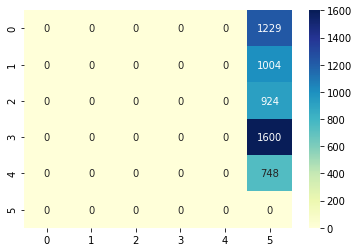

In [101]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="YlGnBu", annot=True, fmt="d")

In [102]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 0
number of guesses: 5505
% correct: 0.0
